In [1]:
import pandas as pd

avaliacoes = pd.read_csv("b2w.csv")
avaliacoes.head()

original_index                                        review_text  \
0           11955  Bem macio e felpudo...recomendo.  Preço imbatí...   
1           35478  Produto excepcional!  recomendo!!! inovador e ...   
2          122760  recebi o produto antes do prazo mas veio com d...   
3           17114  Bom custo beneficio. Adequado para pessoas que...   
4           19112  Além de higiênico tem o tamanho ideal. Só falt...   

                               review_text_processed  \
0  bem macio e felpudo...recomendo.  preco imbati...   
1  produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  bom custo beneficio. adequado para pessoas que...   
4  alem de higienico tem o tamanho ideal. so falt...   

                               review_text_tokenized  polarity  rating  \
0  ['bem', 'macio', 'felpudo', 'recomendo', 'prec...       1.0       4   
1  ['produto', 'excepcional', 'recomendo', 'inova...       1.0       5   
2  ['recebi', 'produto', 'antes', 'do', 'prazo', ...       0.0       1   
3  ['bom', 'custo', 'beneficio', 'adequado', 'par...       1.0       5   
4  ['alem', 'de', 'higienico', 'tem', 'tamanho', ...       NaN       3   

   kfold_polarity  kfold_rating  
0               1             1  
1               1             1  
2               1             1  
3               1             1  
4              -1             1

In [2]:
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis = 1)

In [3]:
avaliacoes.head()

review_text  polarity
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1  Produto excepcional!  recomendo!!! inovador e ...       1.0
2  recebi o produto antes do prazo mas veio com d...       0.0
3  Bom custo beneficio. Adequado para pessoas que...       1.0
4  Além de higiênico tem o tamanho ideal. Só falt...       NaN

In [4]:
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes

review_text  polarity
0       Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1       Produto excepcional!  recomendo!!! inovador e ...       1.0
2       recebi o produto antes do prazo mas veio com d...       0.0
3       Bom custo beneficio. Adequado para pessoas que...       1.0
5       ótmo produto atendeu as expectativas, a entreg...       1.0
...                                                   ...       ...
132367  Ótimo jogo, um dos melhores que joguei. Entreg...       1.0
132368  SMARTHPHONE  PERFEITO  MUITO  BOM  E  A  ECONO...       1.0
132369  Eu estou muito chateado com isso gostaria que ...       0.0
132371  O produto anunciado no site dizia ser  100% al...       0.0
132372  Não recebi o produto e consta como entregue no...       0.0

[116058 rows x 2 columns]

In [5]:
avaliacoes.polarity.value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, 
                                                             avaliacoes.polarity, stratify=avaliacoes.polarity, random_state= 71)

In [7]:
classe_teste

70278     1.0
115089    1.0
128187    0.0
68697     0.0
50025     1.0
         ... 
25617     1.0
106407    1.0
26220     1.0
109010    0.0
49437     0.0
Name: polarity, Length: 29015, dtype: float64

In [8]:
from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()

# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Este produto é muito bom", 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [10]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [11]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [12]:
matriz_esparsa

bom  este  muito  produto  ruim
0    1     1      1        1     0
1    0     1      1        1     1

In [13]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


In [14]:
vetorizar = CountVectorizer(max_features=100)
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [15]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, stratify= avaliacoes.polarity, random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.8873686024470102


In [16]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
    vetorizar = CountVectorizer(max_features=100)
    bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(
        bag_of_words, avaliacoes[coluna_sentimento], 
        stratify= avaliacoes[coluna_sentimento], random_state=71)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)



In [17]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8873686024470102


# Word cloud


In [18]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)


In [19]:
len(todas_avaliacoes)

116058

In [20]:
len(todas_palavras)

16570763

In [21]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [22]:
nuvem_palavras

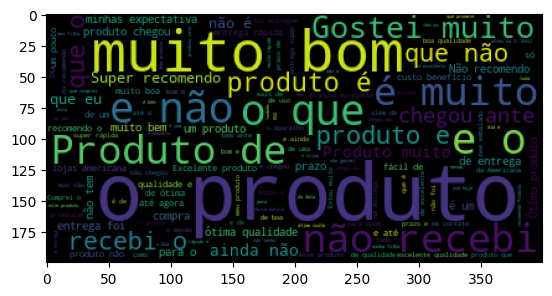

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)

In [24]:
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110).generate(todas_palavras)

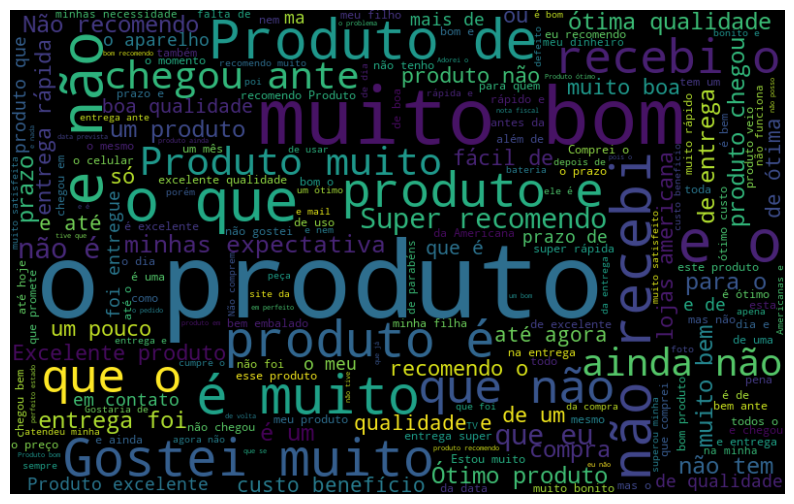

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
def word_cloud_neg(dados, coluna_texto):
    texto_negativo = dados.query("polarity == 0")
    todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
    todas_palavras = ' '.join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                             max_font_size=110, 
                             collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [27]:
def word_cloud_pos(dados, coluna_texto):
    texto_positivo = dados.query("polarity == 1")
    todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
    todas_palavras = ' '.join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                             max_font_size=110, 
                             collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

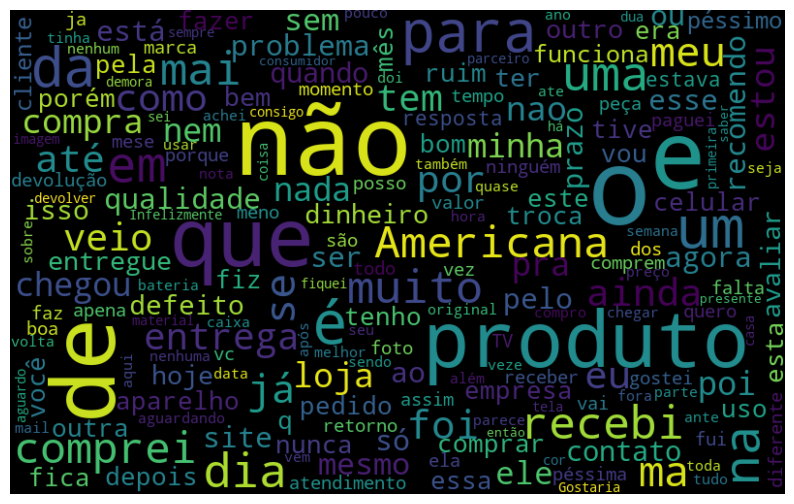

In [28]:
word_cloud_neg(avaliacoes, "review_text")

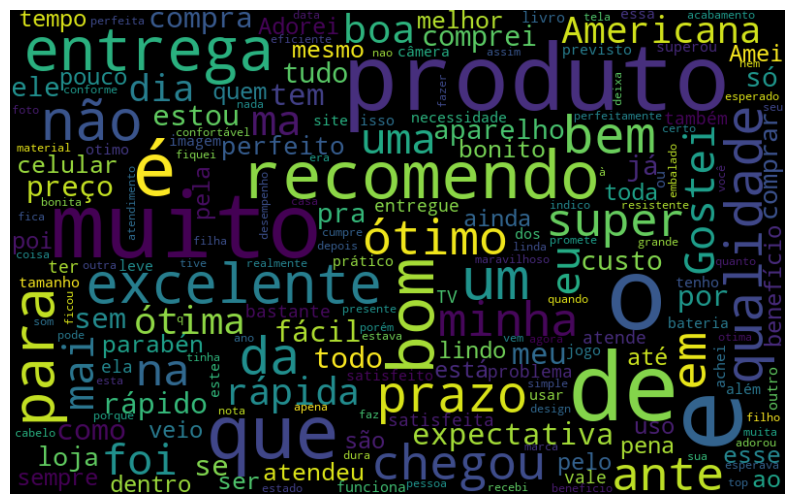

In [29]:
word_cloud_pos(avaliacoes, "review_text")

NLTK

In [30]:
import nltk as nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk

True

In [31]:
corpus = ['muito bom este produto', 'muito ruim este produto']
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'muito bom este produto': 1, 'muito ruim este produto': 1})

In [32]:
from nltk import tokenize
frase = "muito bom este produto"
token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase)
token_frase

['muito', 'bom', 'este', 'produto']

In [33]:
token_por_espaco = tokenize.WhitespaceTokenizer()

In [34]:
token_dataset = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [35]:
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())})

In [36]:
dataframe_frequencia.head()

Palavra  Frequencia
0                   Bem         413
1                 macio         216
2                     e       89308
3  felpudo...recomendo.           1
4                 Preço         334

In [37]:
dataframe_frequencia.nlargest(columns = "Frequencia", n = 10)

Palavra  Frequencia
2         e       89308
20        o       76053
17       de       75791
39        a       66640
50      que       53574
33      não       44253
23       do       36776
43    muito       36566
60        é       36314
21  produto       34983

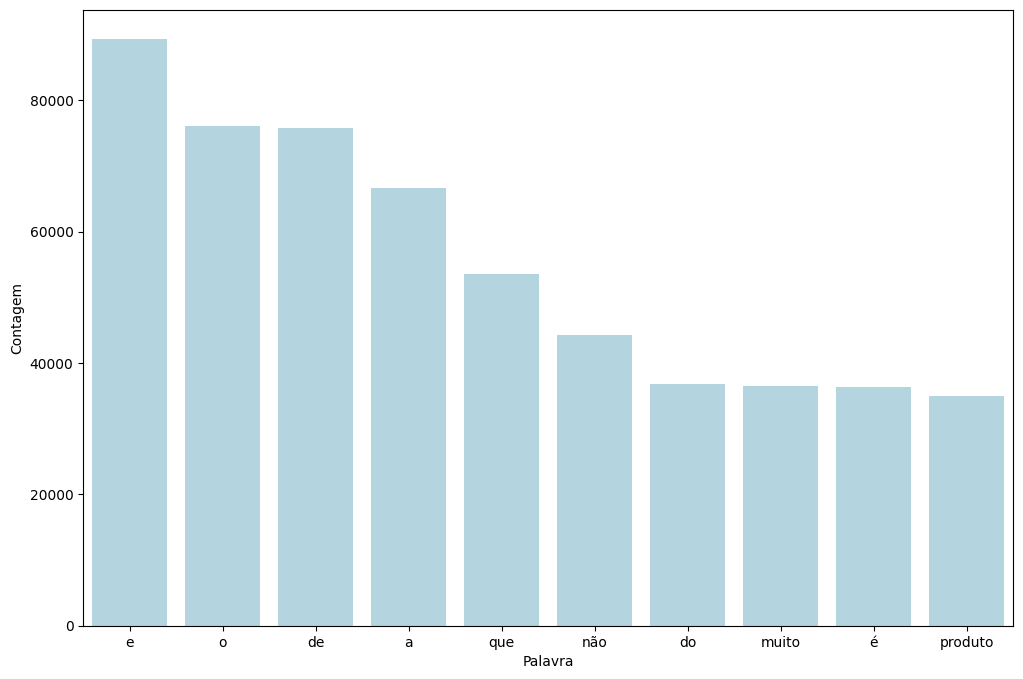

In [38]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns= "Frequencia", n=10),
                 x= "Palavra", y= "Frequencia", color = "lightblue")
ax.set(ylabel = "Contagem")
plt.show()

In [39]:
def grafico(dados, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
    token_frase = token_por_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                          "Frequencia": list(frequencia.values())})
    dataframe_frequencia.nlargest(columns = "Frequencia", n = quantidade)
    ax = sns.barplot(data = dataframe_frequencia.nlargest(columns= "Frequencia", n=quantidade),
                 x= "Palavra", y= "Frequencia", color = "lightblue")
    ax.set(ylabel = "Contagem")
    plt.show()


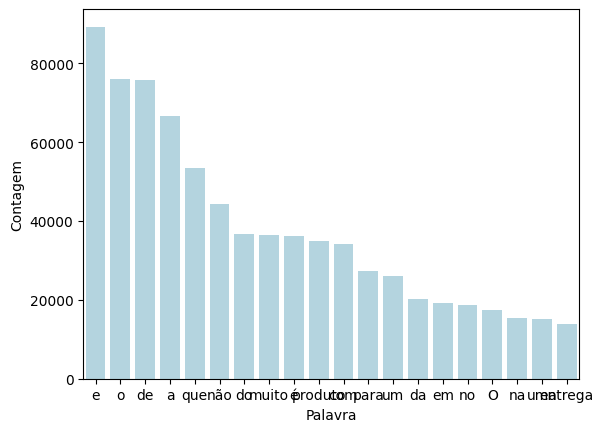

In [40]:
grafico(avaliacoes, "review_text", 20)

Remoção de stop words

In [41]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [42]:
frase_peocessada = list()
for avaliacao in avaliacoes.review_text:
    nova_frase = list()
    palavras_texto = token_por_espaco.tokenize(avaliacao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_peocessada.append(' '.join(nova_frase))
avaliacoes["texto_sem_stopwords"] = frase_peocessada            

In [43]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  
0  Bem macio felpudo...recomendo. Preço imbatível...  
1  Produto excepcional! recomendo!!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio. Adequado pessoas fazem us...  
5  ótmo produto atendeu expectativas, entrega oco...

In [44]:
treinar_modelo(avaliacoes, "texto_sem_stopwords", "polarity")

0.8790970187833879

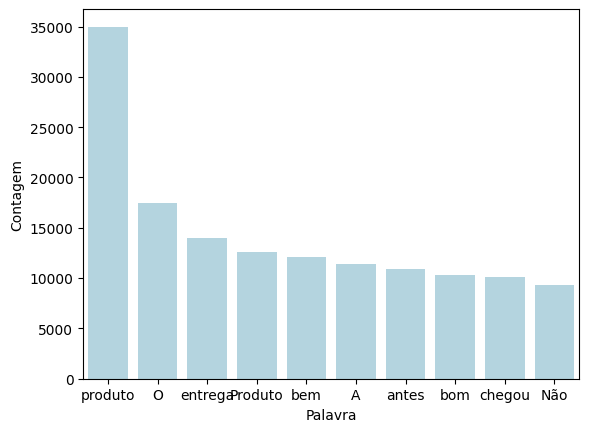

In [45]:
grafico(avaliacoes, "texto_sem_stopwords", 10)

In [46]:
from nltk import tokenize
frase = "Muito bom, este produto."
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [47]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [49]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_peocessada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(avaliacao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_peocessada.append(' '.join(nova_frase))
avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_peocessada

In [50]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  
0  Bem macio felpudo ... recomendo Preço imbatíve...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  ótmo produto atendeu expectativas entrega ocor...

In [51]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom'

In [52]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

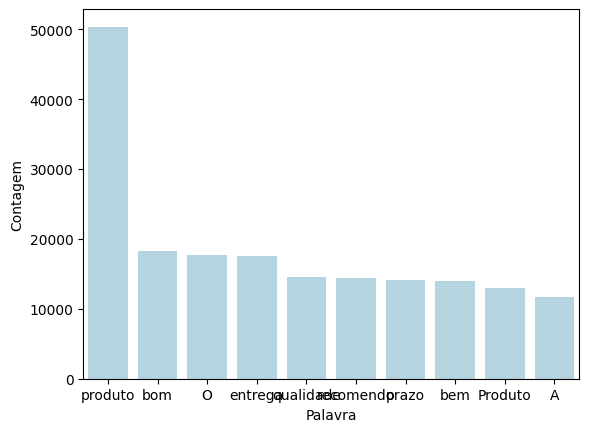

In [53]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 10)

In [54]:
import unidecode
acentos = "ótimo péssimo não tão é"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao tao e'

In [55]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [56]:
sem_acentos[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [57]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [58]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [59]:
avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = sem_acentos


frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = frase_processada

In [60]:
print(treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos", "polarity"))


0.8824745821127004


In [61]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  
0  Bem macio felpudo ... recomendo Preco imbative...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  otmo produto atendeu expectativas entrega ocor...

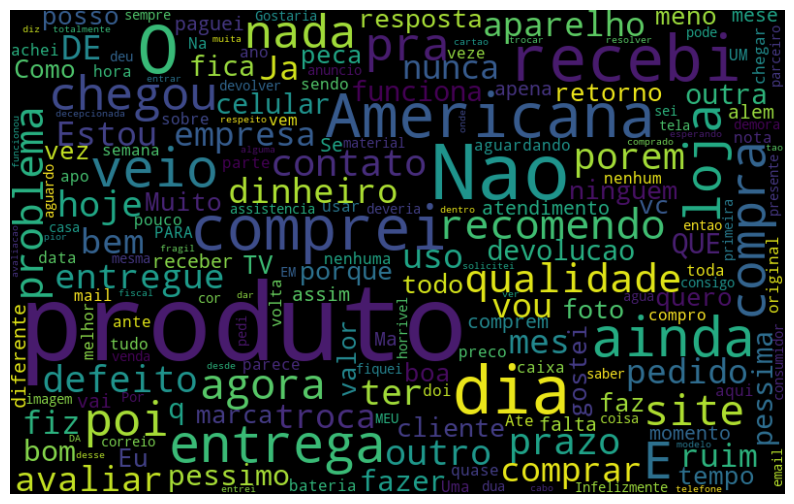

In [62]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

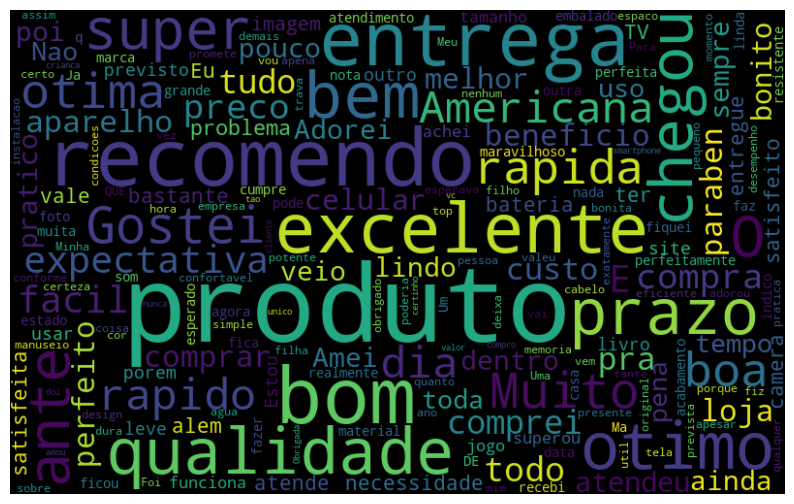

In [63]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

In [64]:
frase = "O Rato Roeu a Roupa do Rei de Roma"

print(frase.lower())

o rato roeu a roupa do rei de roma


In [65]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos_minusculo"] = frase_processada


In [66]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

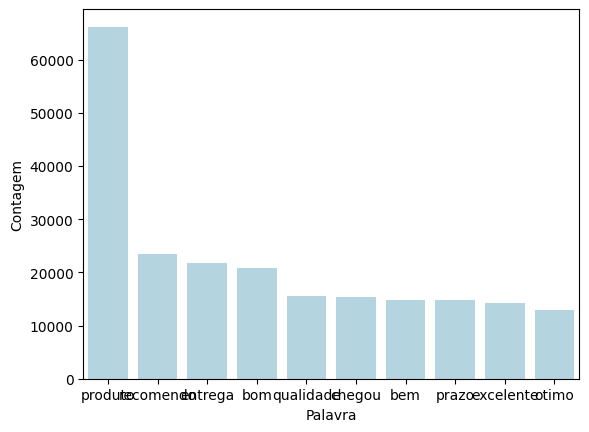

In [67]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", 10)

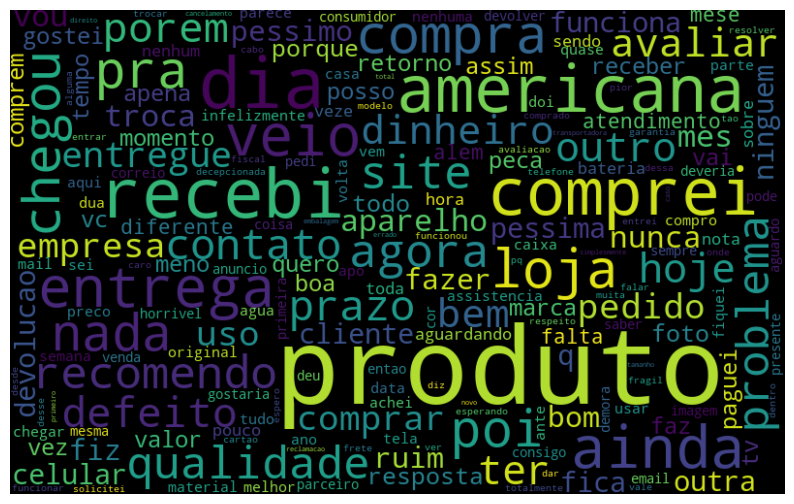

In [68]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

In [69]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos_minusculo"] = frase_processada

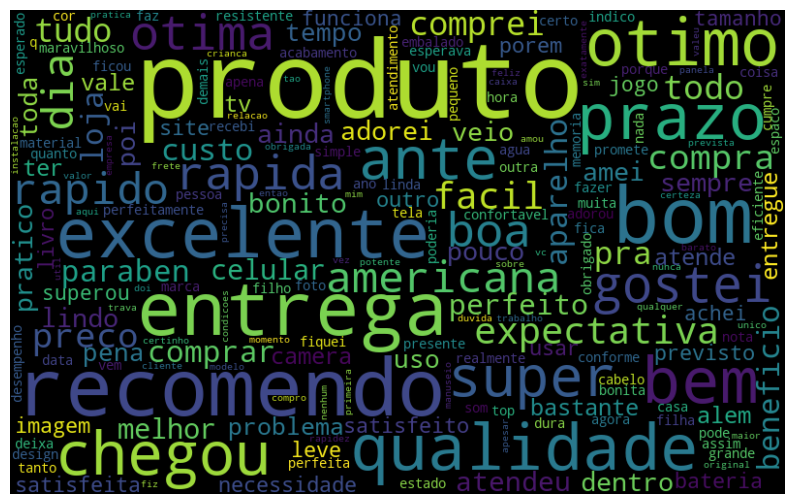

In [70]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

# Steeming RSLP

In [71]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("Corredor")
stemmer.stem("Correr")
stemmer.stem("Correria")

'corr'

In [72]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

In [73]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos_minusculo:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))


avaliacoes["texto_stemmizado"] = frase_processada

In [74]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [75]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos", "polarity")

0.8824745821127004

In [76]:
treinar_modelo(avaliacoes, "texto_stemmizado", "polarity")

0.8852662415991729

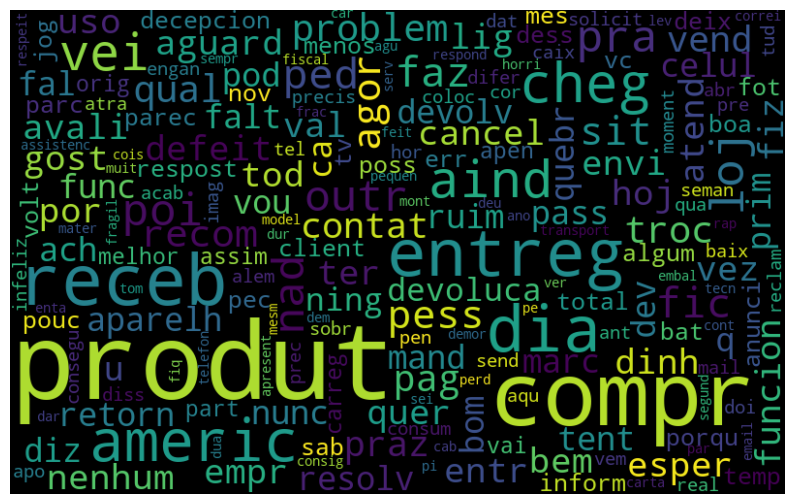

In [77]:
word_cloud_neg(avaliacoes, "texto_stemmizado")

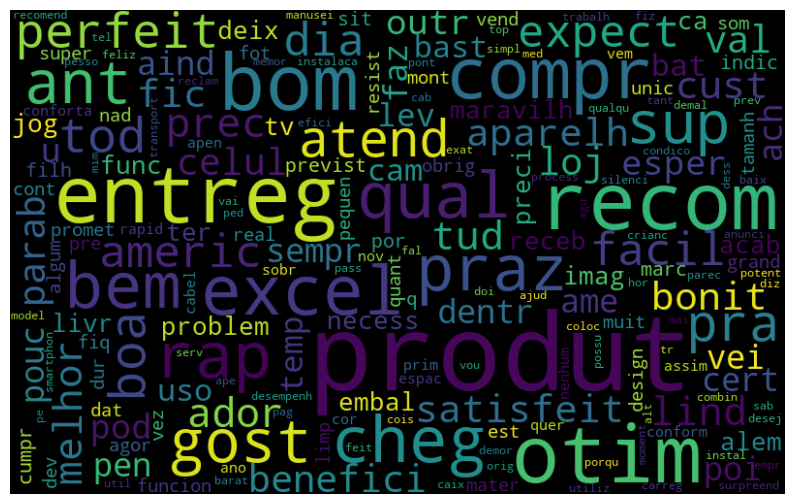

In [78]:
word_cloud_pos(avaliacoes, "texto_stemmizado")

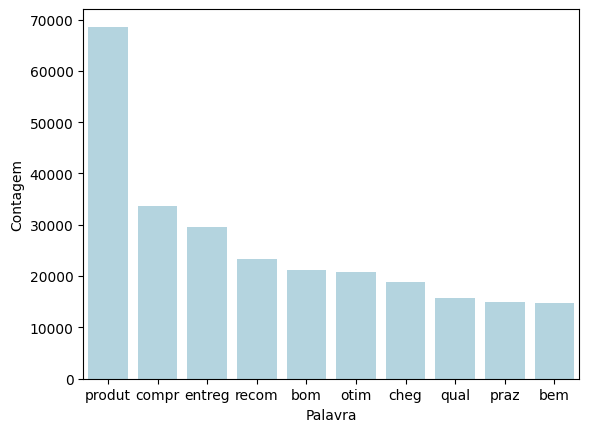

In [79]:
grafico(avaliacoes, "texto_stemmizado", 10)

## TF IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Este produto é muito bom", "Este produto é muito ruim"]
tfidf = TfidfVectorizer(lowercase=False, max_features=100)
caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

Este       bom     muito   produto      ruim
0  0.448321  0.630099  0.448321  0.448321  0.000000
1  0.448321  0.000000  0.448321  0.448321  0.630099

In [81]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [82]:
tfidf_tratados = tfidf.fit_transform(avaliacoes.texto_stemmizado)
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state = 71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf

0.8859210753058763

NGrams

In [84]:
from nltk import ngrams
frase = "comprei um ótimo produto"
frase_separada = token_por_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto')]

In [86]:
tdidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              avaliacoes.polarity,
                                                              random_state=71)
regressao_logistica = LogisticRegression(max_iter=200)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.8871962777873513

In [88]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

pesos.nlargest(10, 0)

0
excel      9.423861
otim       9.163409
ador       6.596798
perfeit    6.354043
satisfeit  5.402183
ame        5.377869
bom        5.124639
parab      4.894715
lind       4.304959
rap        4.037971

In [89]:
pesos.nsmallest(10, 0)

0
pess   -6.325319
receb  -3.157846
defeit -2.617735
vei    -2.602958
troc   -2.539381
contat -2.346151
avali  -2.301689
hoj    -1.950633
nad    -1.944029
ped    -1.892963

In [90]:
pesos.nlargest(100, 0)

0
excel      9.423861
otim       9.163409
ador       6.596798
perfeit    6.354043
satisfeit  5.402183
...             ...
troc      -2.539381
vei       -2.602958
defeit    -2.617735
receb     -3.157846
pess      -6.325319

[100 rows x 1 columns]

In [91]:
pesos.nsmallest(100, 0)

0
pess      -6.325319
receb     -3.157846
defeit    -2.617735
vei       -2.602958
troc      -2.539381
...             ...
satisfeit  5.402183
perfeit    6.354043
ador       6.596798
otim       9.163409
excel      9.423861

[100 rows x 1 columns]